In [1]:
### importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
"%matplotlib inline"
import warnings
warnings.filterwarnings('ignore')

In [6]:
path=r"C:\Users\sarthak gangwar\PYTHON Programs\Business Project EDA\cardekho_dataset.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [8]:
print(df.duplicated().sum())


0


In [9]:
print("Categories in 'seller_type' ",end = " ")
print(df['seller_type'].unique())
print("\n")

print("Categories in 'fuel_type' ",end = " ")
print(df['fuel_type'].unique())
print("\n")

print("Categories in 'transmission_type' ",end = " ")
print(df['transmission_type'].unique())
print("\n")

print("Categories in 'seats' ",end = " ")
print(df['seats'].unique())

Categories in 'seller_type'  ['Individual' 'Dealer' 'Trustmark Dealer']


Categories in 'fuel_type'  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


Categories in 'transmission_type'  ['Manual' 'Automatic']


Categories in 'seats'  [5 8 7 6 4 2 9 0]


In [10]:
df[df['seats']==0]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,4098,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,15992,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

### print columns
print(f"We have {len(categorical_features)} numerical_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 6 numerical_features: ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical_features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


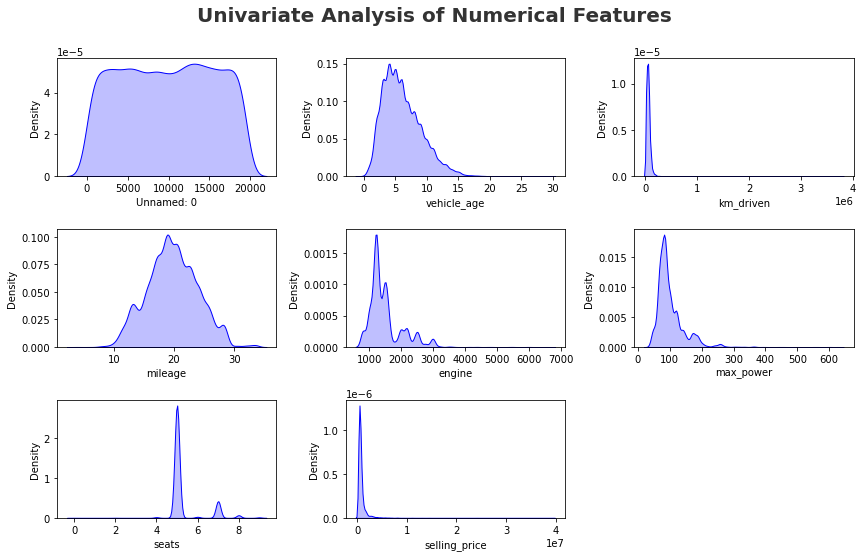

In [13]:
plt.figure(figsize=(12,12))
###The suptitle() method figure module of matplotlib library is used to Add a centered title to the figure.
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [14]:
df[numeric_features].corr()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
Unnamed: 0,1.000000,-0.006250,-0.003778,-0.014699,0.012972,0.039367,-0.031832,0.030523
vehicle_age,-0.006250,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,-0.003778,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.014699,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.012972,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.039367,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,-0.031832,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,0.030523,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


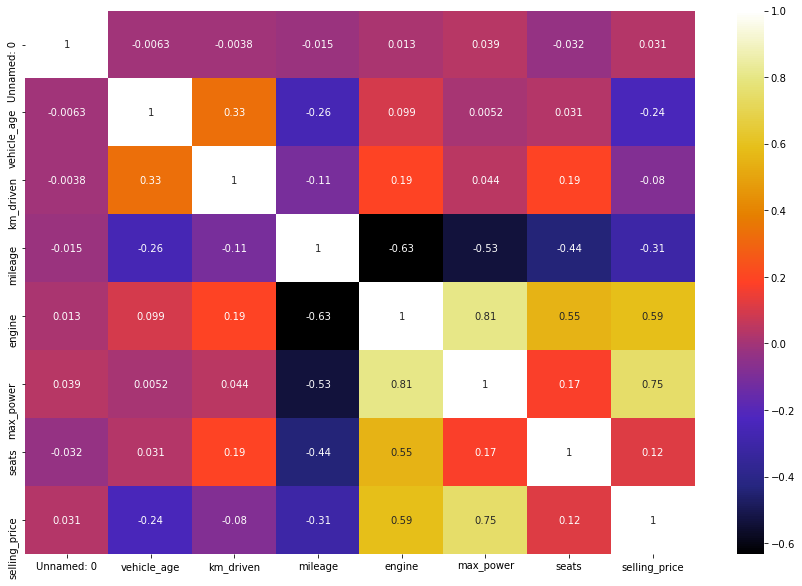

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

In [16]:
from scipy.stats import chi2_contingency
dataset_table = pd.crosstab(df['selling_price'],df['brand'])
chi2_contingency(dataset_table)
p_value = chi2_contingency(pd.crosstab(df['selling_price'], df['brand']))[1]
p_value

0.0

In [17]:
#### applying chi-square test for all categorical variables
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    ##if p_value<0.05
    if chi2_contingency(pd.crosstab(df['selling_price'],df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['Features','Hypothesis Result']
result

,Features,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


In [18]:
continuous_features = []
for feature in numeric_features:
    if len(df[feature].unique()) >= 10:
        continuous_features.append(feature)
        
continuous_features

['Unnamed: 0',
 'vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'selling_price']

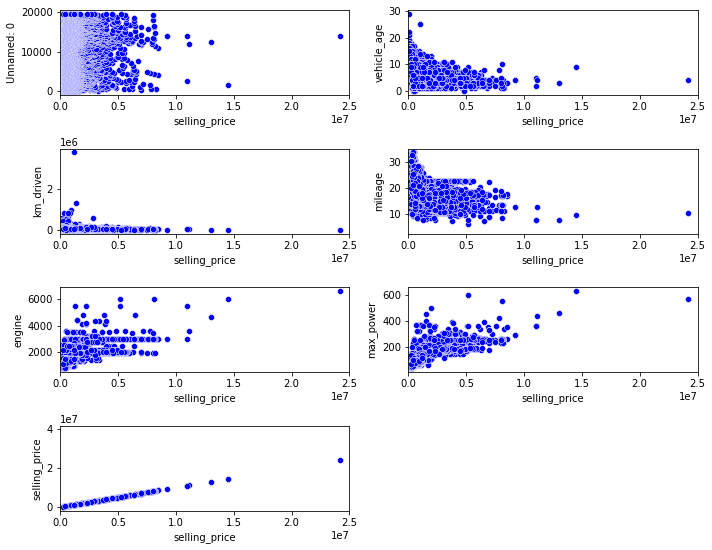

In [19]:

fig = plt.figure(figsize=(10, 15))
for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 2.5 cr Rupees to view clean
    plt.tight_layout()

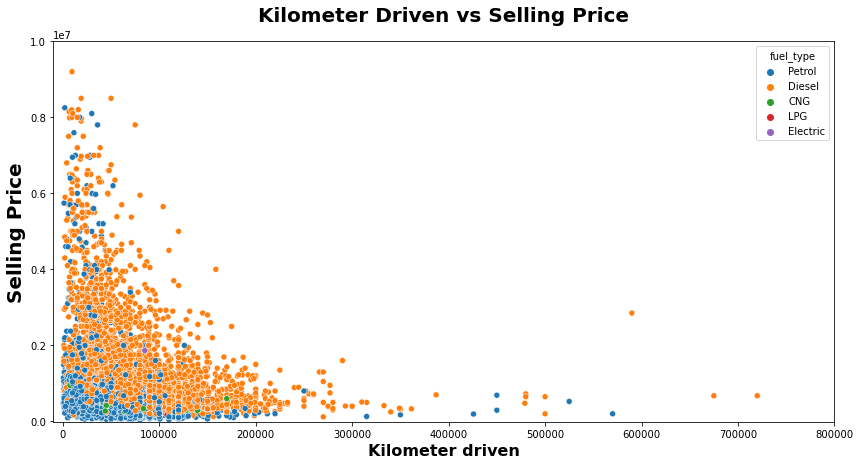

In [20]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

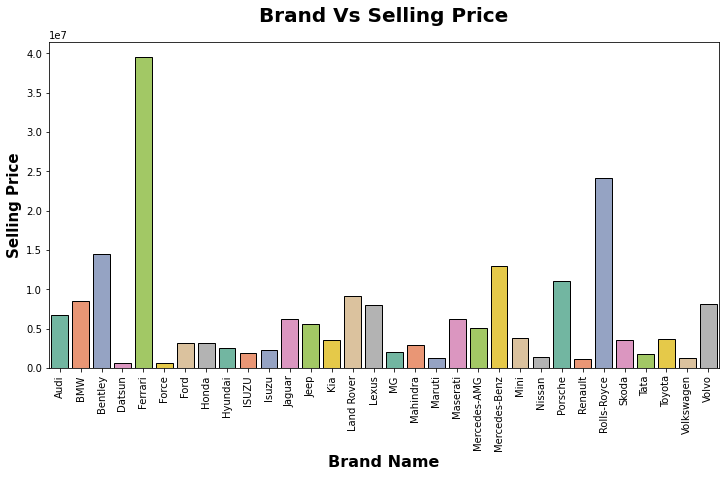

In [21]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
plt.subplots(figsize = (12,6))
sns.barplot(x=brand.index,y=brand.values,ec='black',palette='Set2')
plt.title("Brand Vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight='bold', fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

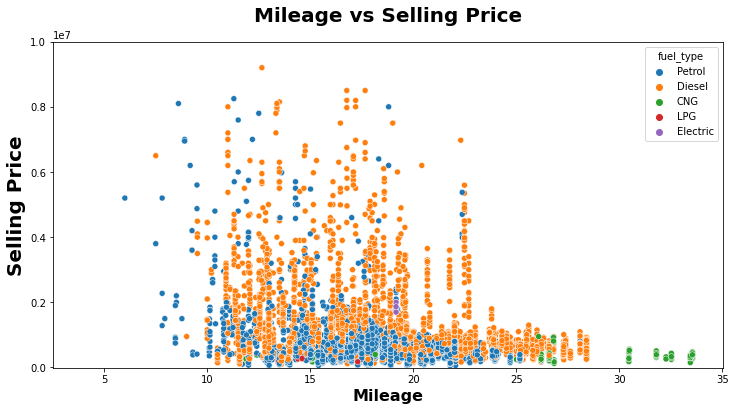

In [22]:
plt.subplots(figsize=(12,6))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'sns' is not defined

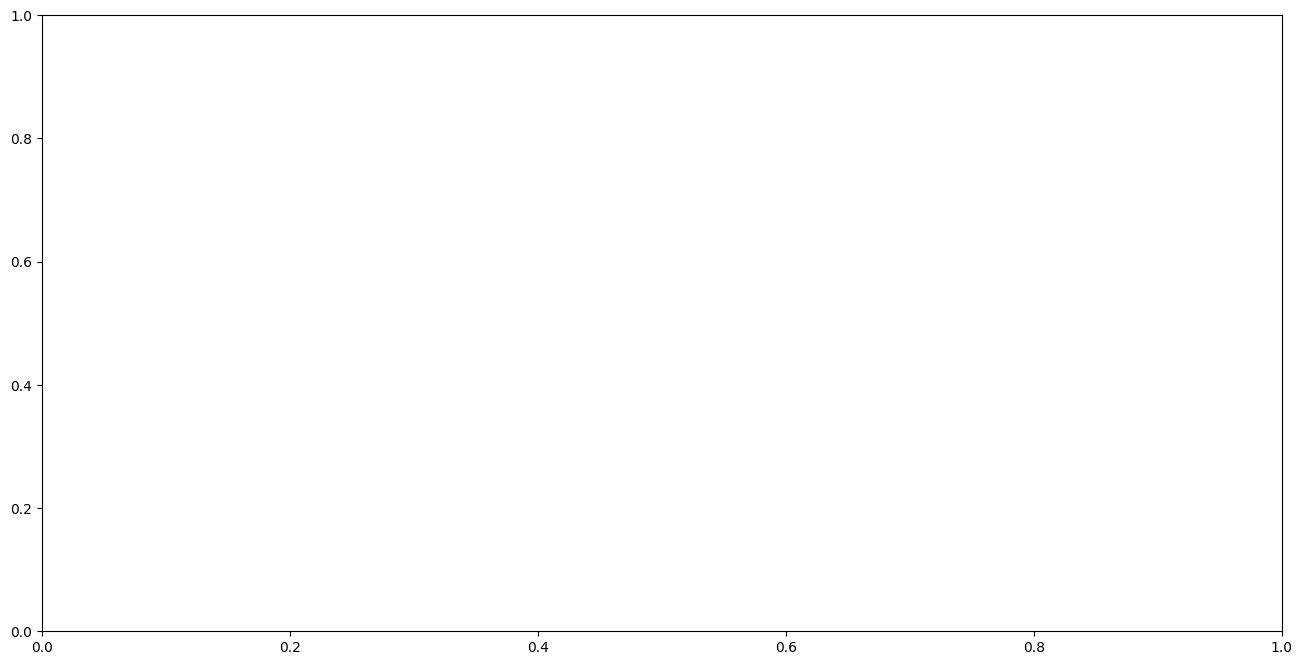

In [2]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,8))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()